# Model

In [1]:
from keras import layers
from keras import models
from keras import optimizers

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [3]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

# Using Image Data Generator

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

In [5]:
base_dir = 'DataBaseCustom/DATASET'
train_dir = base_dir + '/TRAIN'
test_dir = base_dir + '/TEST'

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 1074 images belonging to 5 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 466 images belonging to 5 classes.


In [8]:
history = model.fit(train_generator, steps_per_epoch = 20, epochs = 50)

C:\Users\Dhananjay\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50


C:\Users\Dhananjay\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 18s 918ms/step - loss: 23.2711 - acc: 0.2300
Epoch 2/50
20/20 [==============================] - 22s 1s/step - loss: 4.2518 - acc: 0.2665
Epoch 3/50
20/20 [==============================] - 18s 922ms/step - loss: 2.2346 - acc: 0.3075
Epoch 4/50
20/20 [==============================] - 21s 1s/step - loss: 1.8316 - acc: 0.3426
Epoch 5/50
20/20 [==============================] - 18s 920ms/step - loss: 1.7166 - acc: 0.3275
Epoch 6/50
20/20 [==============================] - 19s 954ms/step - loss: 1.6467 - acc: 0.3400
Epoch 7/50
20/20 [==============================] - 18s 876ms/step - loss: 1.5224 - acc: 0.4225
Epoch 8/50
20/20 [==============================] - 20s 993ms/step - loss: 1.3921 - acc: 0.4325
Epoch 9/50
20/20 [==============================] - 18s 878ms/step - loss: 1.4765 - acc: 0.4416
Epoch 10/50
20/20 [==============================] - 18s 887ms/step - loss: 1.4669 - acc: 0.4600
Epoch 11/50
20/20 [==============================] - 16

In [9]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

24/24 - 14s - loss: 1.2642 - acc: 0.6824


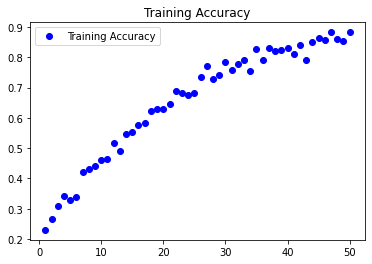

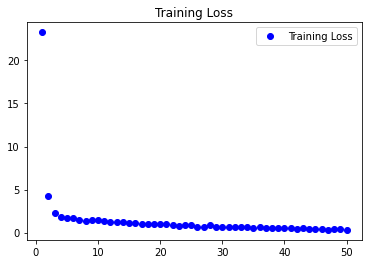

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [11]:
model.save('YogaPoseClassifierCNNRegularCustomDB.h5')

# Open pose only

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [14]:
train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

In [15]:
base_dir = 'DataBaseCustom/DATASET_BLACK'
train_dir = base_dir + '/TRAIN'
test_dir = base_dir + '/TEST'

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 1082 images belonging to 5 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 469 images belonging to 5 classes.


In [19]:
history = model.fit(train_generator, steps_per_epoch = 20, epochs = 50)

Epoch 1/50
20/20 [==============================] - 14s 675ms/step - loss: 7.1450 - acc: 0.3927
Epoch 2/50
20/20 [==============================] - 13s 665ms/step - loss: 4.0273 - acc: 0.4475
Epoch 3/50
20/20 [==============================] - 15s 734ms/step - loss: 2.7252 - acc: 0.4825
Epoch 4/50
20/20 [==============================] - 15s 729ms/step - loss: 2.1602 - acc: 0.5157
Epoch 5/50
20/20 [==============================] - 15s 730ms/step - loss: 1.5340 - acc: 0.5750
Epoch 6/50
20/20 [==============================] - 14s 707ms/step - loss: 1.0960 - acc: 0.6550
Epoch 7/50
20/20 [==============================] - 14s 710ms/step - loss: 1.0901 - acc: 0.6475
Epoch 8/50
20/20 [==============================] - 13s 662ms/step - loss: 1.0190 - acc: 0.7068
Epoch 9/50
20/20 [==============================] - 14s 702ms/step - loss: 0.8164 - acc: 0.7500
Epoch 10/50
20/20 [==============================] - 14s 710ms/step - loss: 0.7133 - acc: 0.7750
Epoch 11/50
20/20 [====================

In [20]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

24/24 - 10s - loss: 0.8805 - acc: 0.8017


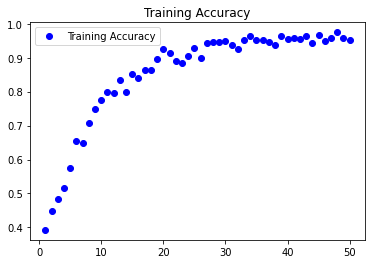

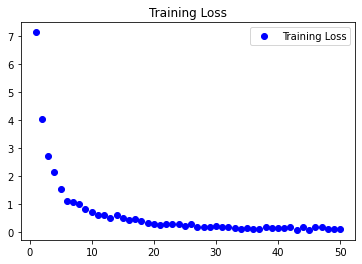

In [21]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [22]:
model.save('YogaPoseClassifierCNNBlackCustomDB.h5')

# Open pose and Image

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [25]:
train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

In [26]:
base_dir = 'DataBaseCustom/DATASET_OP'
train_dir = base_dir + '/TRAIN'
test_dir = base_dir + '/TEST'

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 1082 images belonging to 5 classes.


In [28]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical')

Found 469 images belonging to 5 classes.


In [29]:
history = model.fit_generator(train_generator, steps_per_epoch = 20, epochs = 50)

Epoch 1/50
20/20 [==============================] - 17s 830ms/step - loss: 17.5146 - acc: 0.2700
Epoch 2/50
20/20 [==============================] - 15s 733ms/step - loss: 3.9106 - acc: 0.3089
Epoch 3/50
20/20 [==============================] - 15s 754ms/step - loss: 2.3271 - acc: 0.3534
Epoch 4/50
20/20 [==============================] - 16s 792ms/step - loss: 1.8384 - acc: 0.4188
Epoch 5/50
20/20 [==============================] - 17s 875ms/step - loss: 1.5155 - acc: 0.4712
Epoch 6/50
20/20 [==============================] - 28s 1s/step - loss: 1.4607 - acc: 0.4600
Epoch 7/50
20/20 [==============================] - 30s 2s/step - loss: 1.3980 - acc: 0.4625
Epoch 8/50
20/20 [==============================] - 32s 2s/step - loss: 1.1802 - acc: 0.5950
Epoch 9/50
20/20 [==============================] - 30s 2s/step - loss: 1.1046 - acc: 0.6000
Epoch 10/50
20/20 [==============================] - 46s 2s/step - loss: 1.0679 - acc: 0.6050
Epoch 11/50
20/20 [==============================] - 

In [30]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

24/24 - 12s - loss: 0.9747 - acc: 0.7569


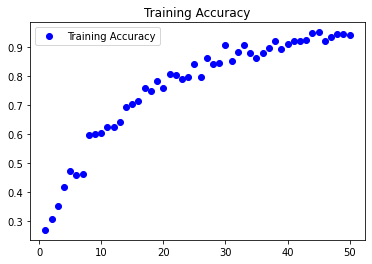

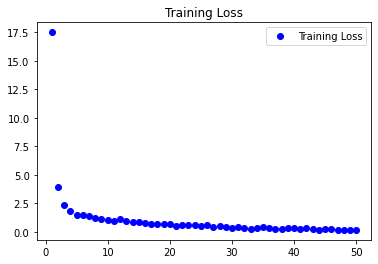

In [31]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [32]:
model.save('YogaPoseClassifierCNNOpCustomDB.h5')